In [3]:
import pandas as pd

# Read the first few rows of the CSV to get an idea of the data structure
df1 = pd.read_csv('headhunter_TargetLocation.csv')
df1.head()

# Read the first few rows of the second CSV to understand the data structure
df2 = pd.read_csv('Mission_Location.csv')
df2.head()


,mission,location,slug,label,type,level,parent,longitude,latitude,code,currency,phoneCode,timezones,isCapital,airtableId,created,updated,synced
0,rec9RDss2TSARp40h,americas/united-states,americas/united-states,United States,Country,3,northern-america,-97.0,38.0,USA,USD,1.0,"UTC-06:00,UTC-05:00,UTC-07:00,UTC-08:00,UTC-10...",NaN,recNA46KtfJ0crl2t,2023-04-21 09:52:19,2023-04-21 09:52:19,NaN
1,recA3Ye1PMACJlO1Z,americas/united-states,americas/united-states,United States,Country,3,northern-america,-97.0,38.0,USA,USD,1.0,"UTC-06:00,UTC-05:00,UTC-07:00,UTC-08:00,UTC-10...",NaN,recNA46KtfJ0crl2t,2023-04-21 09:52:19,2023-04-21 09:52:19,NaN
2,recTxgcqkCX1YBpRB,americas/united-states,americas/united-states,United States,Country,3,northern-america,-97.0,38.0,USA,USD,1.0,"UTC-06:00,UTC-05:00,UTC-07:00,UTC-08:00,UTC-10...",NaN,recNA46KtfJ0crl2t,2023-04-21 09:52:19,2023-04-21 09:52:19,NaN
3,recX5s0aDnf7myc85,americas/united-states,americas/united-states,United States,Country,3,northern-america,-97.0,38.0,USA,USD,1.0,"UTC-06:00,UTC-05:00,UTC-07:00,UTC-08:00,UTC-10...",NaN,recNA46KtfJ0crl2t,2023-04-21 09:52:19,2023-04-21 09:52:19,NaN
4,recDVuCcjwX5kSgiz,asia/china,asia/china,China,Country,3,eastern-asia,105.0,35.0,CHN,CNY,86.0,"UTC+06:00,UTC+08:00",NaN,recd2JuaCjBahAJjn,2023-04-21 09:52:19,2023-04-21 09:52:20,NaN


In [4]:
# First, we count the number of unique missions and headhunters for each location
missions_per_location = df2['location'].value_counts()
headhunters_per_location = df1['location'].value_counts()

# Create a DataFrame from these Series
location_counts = pd.DataFrame({
    'Missions': missions_per_location,
    'Headhunters': headhunters_per_location
})

# Reset the index to make 'location' a column
location_counts.reset_index(inplace=True)
location_counts.rename(columns={'index': 'Location'}, inplace=True)

# Merge with df2 to get the latitude and longitude for each location
location_counts = pd.merge(location_counts, df2[['location', 'latitude', 'longitude']].drop_duplicates(), 
                           left_on='Location', right_on='location', how='inner')
location_counts.drop(columns='location', inplace=True)

# Fill NaNs with 0
location_counts.fillna(0, inplace=True)

location_counts.head()


,Location,Missions,Headhunters,latitude,longitude
0,americas/united-states,4.0,34.0,38.000000,-97.000000
1,asia/china,2.0,2.0,35.000000,105.000000
2,asia/china/hong-kong-sar,2.0,0.0,22.319304,114.169361
3,asia/china/shanghai,4.0,0.0,31.230416,121.473701
4,asia/india,7.0,24.0,20.000000,77.000000


In [8]:
# ! pip install geopandas

/var/folders/g2/wtzv0kbn6sg1hy0s50dcj_780000gn/T/ipykernel_78782/2005269512.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


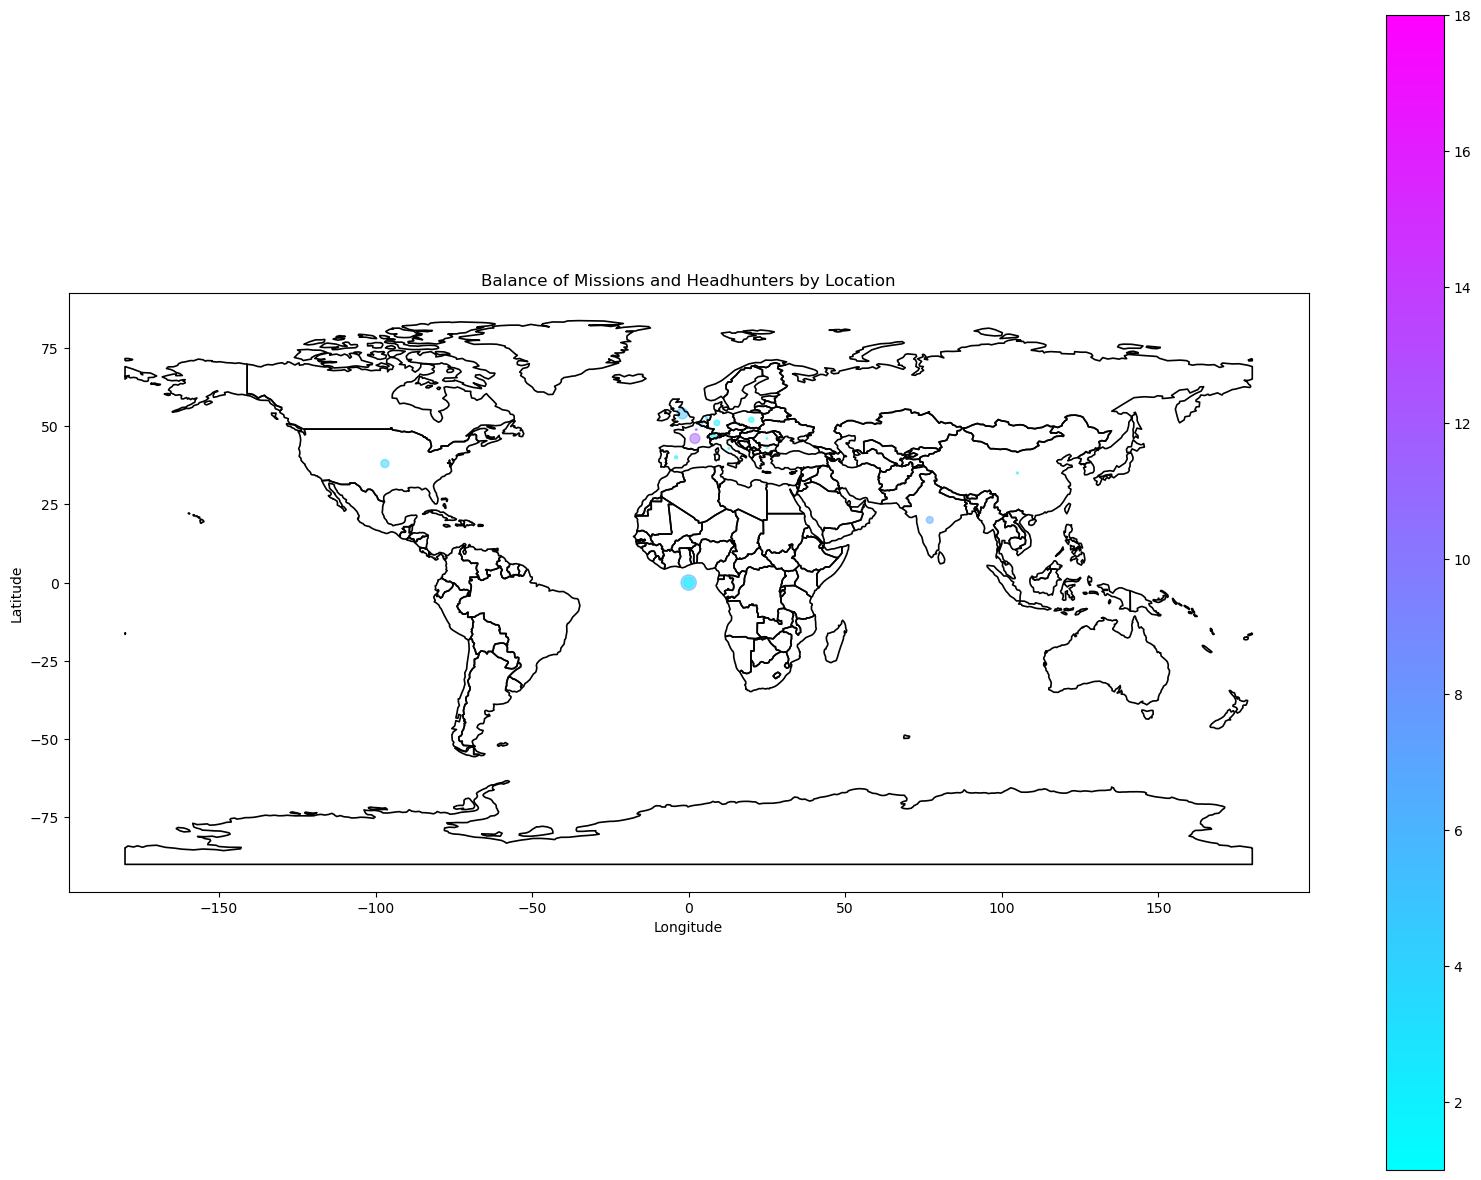

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame from the location_counts DataFrame
gdf = gpd.GeoDataFrame(location_counts, geometry=gpd.points_from_xy(location_counts.longitude, location_counts.latitude))

# Plot the world map
fig, ax = plt.subplots(figsize=(20, 15))
world.boundary.plot(ax=ax, linewidth=1.2, color='black')
gdf.plot(column='Missions', ax=ax, legend=True, cmap='cool', markersize='Headhunters', alpha=0.5)
plt.title('Balance of Missions and Headhunters by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [10]:
# Extract the country from the location fields
df1['Country'] = df1['location'].apply(lambda x: x.split('/')[1] if '/' in x else x)
df2['Country'] = df2['location'].apply(lambda x: x.split('/')[1] if '/' in x else x)

# Count the number of unique missions and headhunters for each country
missions_per_country = df2['Country'].value_counts()
headhunters_per_country = df1['Country'].value_counts()

# Create a DataFrame from these Series
country_counts = pd.DataFrame({
    'Missions': missions_per_country,
    'Headhunters': headhunters_per_country
})

# Reset the index to make 'Country' a column
country_counts.reset_index(inplace=True)
country_counts.rename(columns={'index': 'Country'}, inplace=True)

# Calculate the difference between Missions and Headhunters for each country
country_counts['Difference'] = country_counts['Missions'] - country_counts['Headhunters']

# Fill NaNs with 0
country_counts.fillna(0, inplace=True)

# Merge with world GeoDataFrame
world = world.rename(columns={'name': 'Country'}).merge(country_counts, on='Country', how='left')



/var/folders/g2/wtzv0kbn6sg1hy0s50dcj_780000gn/T/ipykernel_78782/3549758583.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


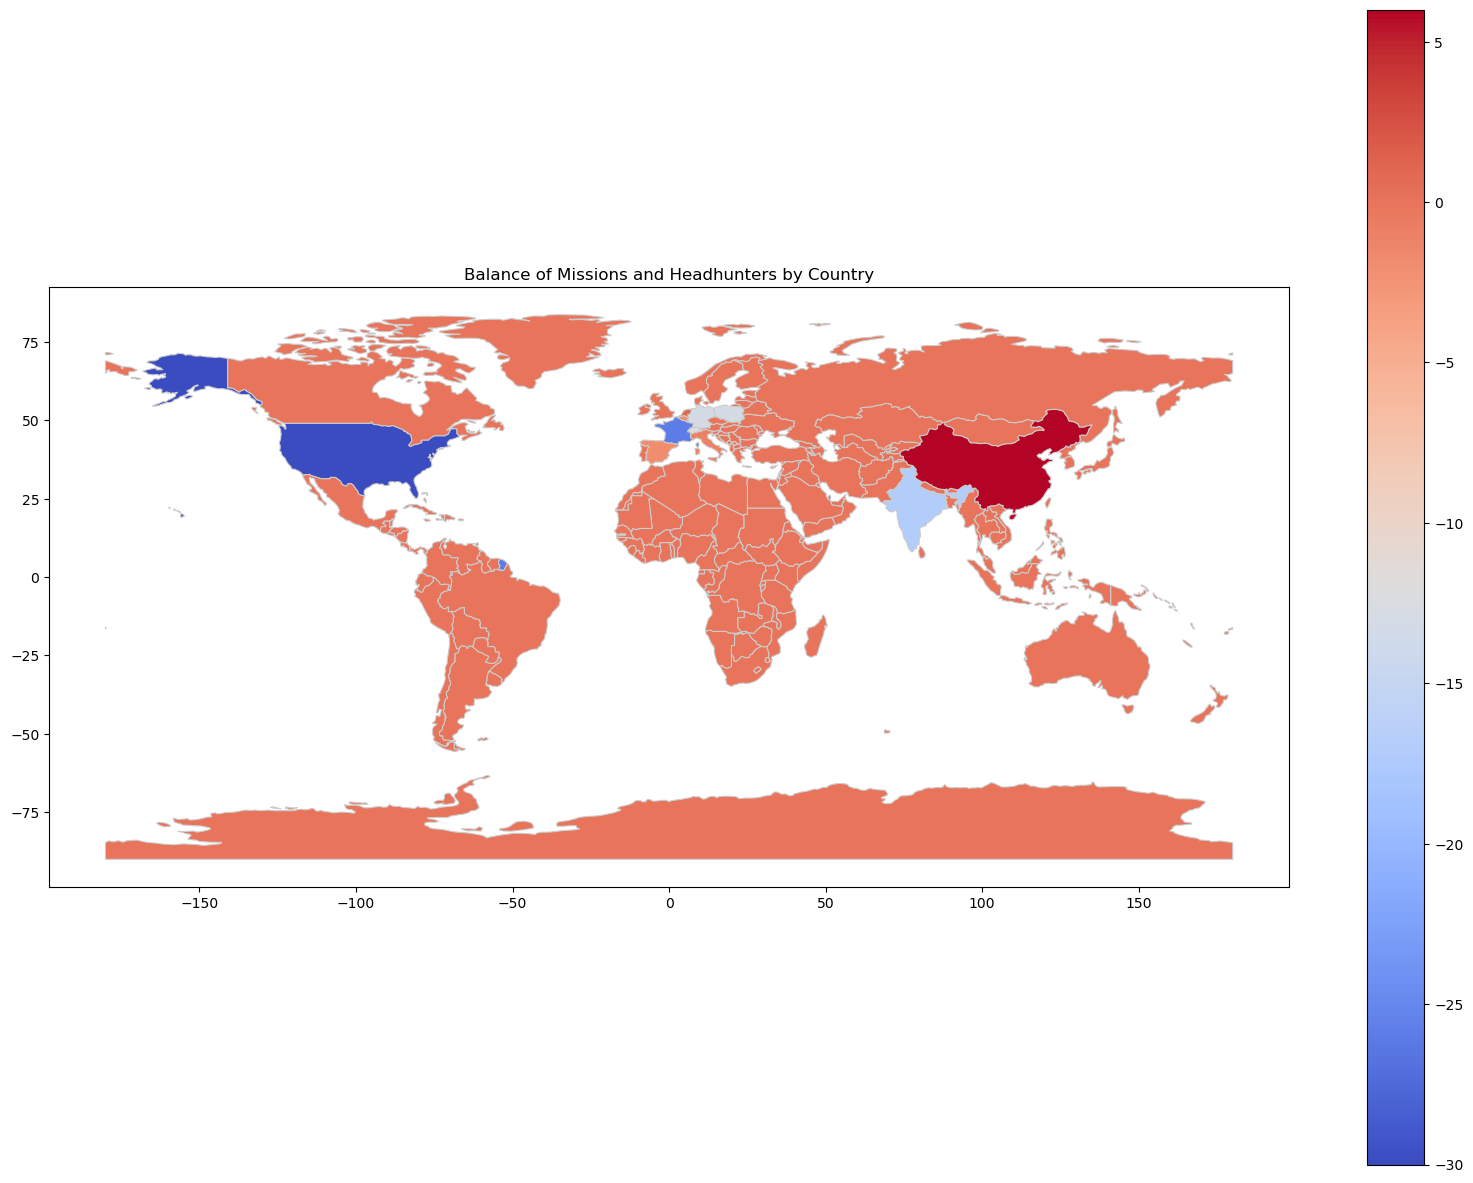

In [11]:
# Re-reading the world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We need to standardize the country names between the world dataset and our data
# Making a dictionary for the countries that are named differently
country_name_mapping = {
    'United States of America': 'united-states',
    'Russia': 'russian-federation',
    'South Korea': 'korea-republic-of',
    'North Korea': 'korea-democratic-people-s-republic-of',
    'Iran': 'iran-islamic-republic-of',
    'Bosnia and Herz.': 'bosnia-and-herzegovina',
    'Central African Rep.': 'central-african-republic',
    'Congo (Brazzaville)': 'congo',
    'Congo (Kinshasa)': 'congo-the-democratic-republic-of-the',
    'Czechia': 'czech-republic',
    'Dominican Rep.': 'dominican-republic',
    'Eq. Guinea': 'equatorial-guinea',
    'eSwatini': 'swaziland',
    'Ivory Coast': "cote-d-ivoire",
    'Laos': "lao-people-s-democratic-republic",
    'Macedonia': "north-macedonia",
    'Moldova': "moldova-republic-of",
    'S. Sudan': "south-sudan",
    'Solomon Is.': "solomon-islands",
    'Palestine': "palestinian-territory-occupied",
    'Syria': "syrian-arab-republic",
    'Venezuela': "venezuela-bolivarian-republic-of",
    'Vietnam': "viet-nam"
}

# Replace country names in the world dataset
world['name'] = world['name'].replace(country_name_mapping)

# Convert country names in the world dataset to lower case
world['name'] = world['name'].str.lower()

# Merge with country_counts DataFrame
world = world.merge(country_counts, left_on='name', right_on='Country', how='left')

# Fill NaNs in the 'Difference' column only
world['Difference'].fillna(0, inplace=True)

# Plot the world map with countries colored by the difference between the number of missions and headhunters
fig, ax = plt.subplots(figsize=(20, 15))
world.plot(column='Difference', ax=ax, legend=True, cmap='coolwarm', linewidth=0.8, edgecolor='0.8')
plt.title('Balance of Missions and Headhunters by Country')
plt.show()


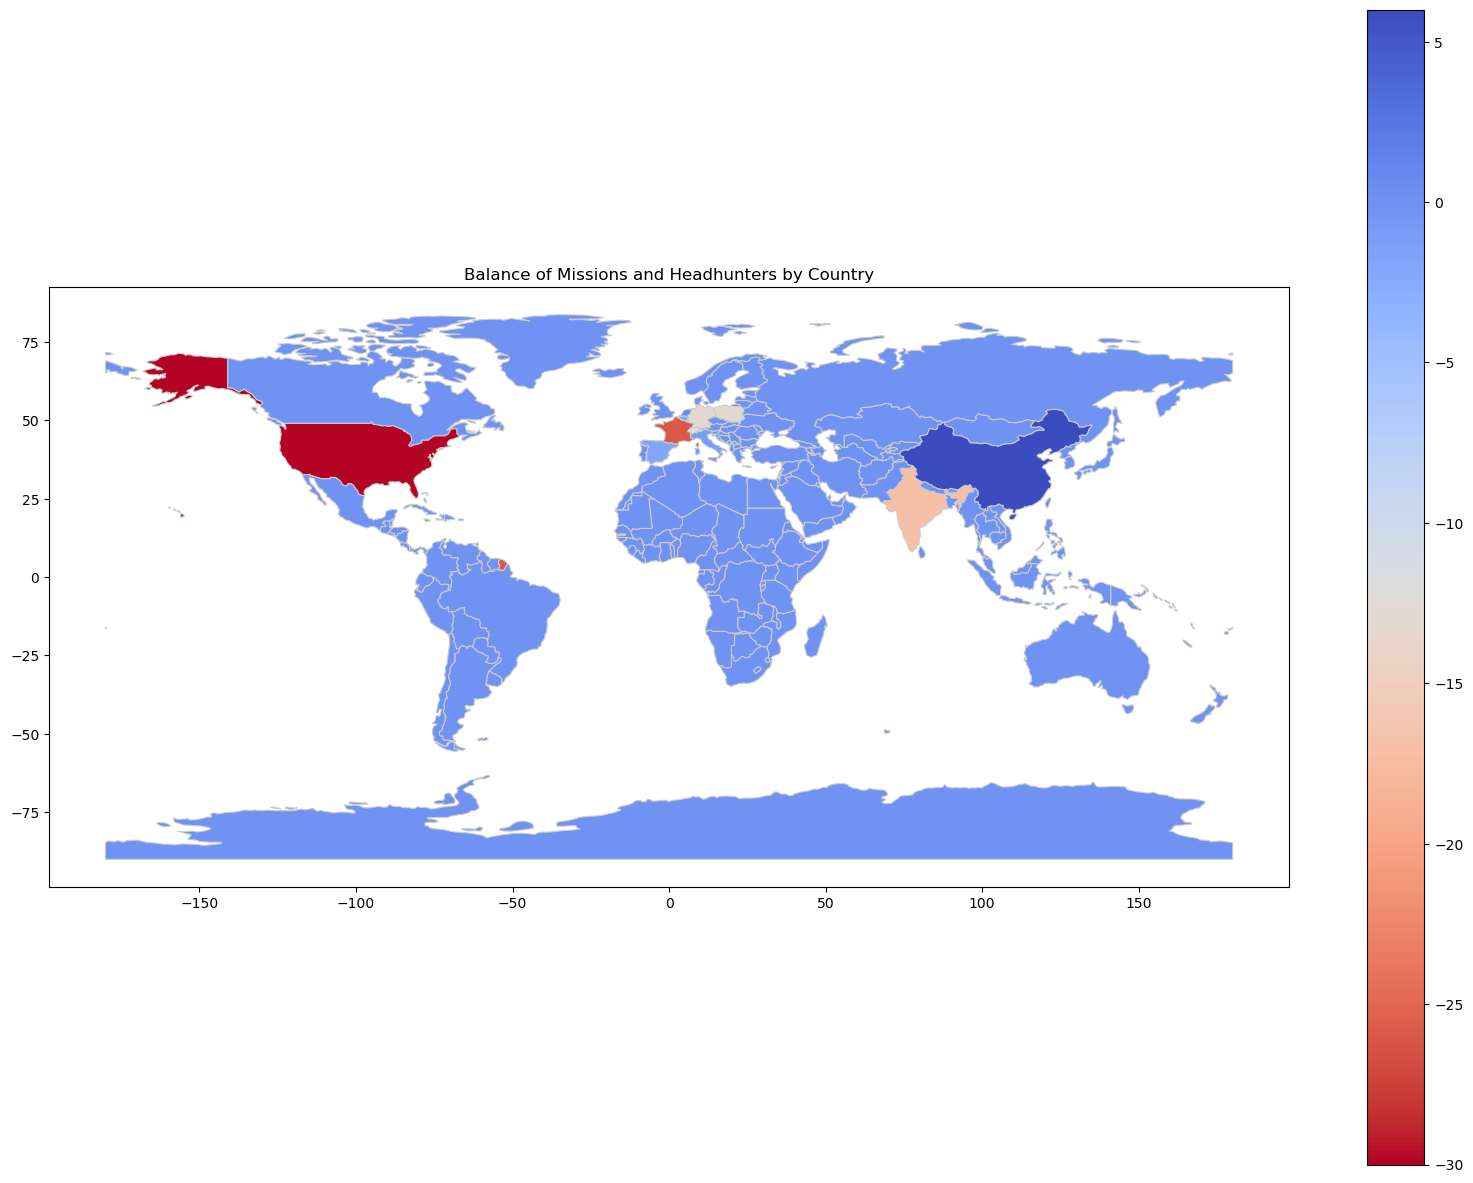

In [12]:
# Plot the world map with countries colored by the difference between the number of missions and headhunters
# Changing the colormap direction to 'coolwarm_r' so that cooler colors represent a surplus of missions
fig, ax = plt.subplots(figsize=(20, 15))
world.plot(column='Difference', ax=ax, legend=True, cmap='coolwarm_r', linewidth=0.8, edgecolor='0.8')
plt.title('Balance of Missions and Headhunters by Country')
plt.show()
